In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

50
[12.67446267  1.17483268  8.5021183   1.85413716 11.7598457   0.        ]
100
[40.76199812  4.80943181  5.32420626  3.32817874  7.75593871  0.        ]
150
[67.45214113  6.10708196  1.65758499  2.47687859  2.59039485  0.        ]
200
[81.85893812  4.23380861  0.46621079  1.28437262  0.79391142  0.        ]
250
[89.09352999  2.20023662  0.15824578  0.57989238  0.29405736  0.        ]
300
[9.21871156e+01 1.25247189e+00 6.75704164e-02 3.13429729e-01
 1.59950520e-01 0.00000000e+00]


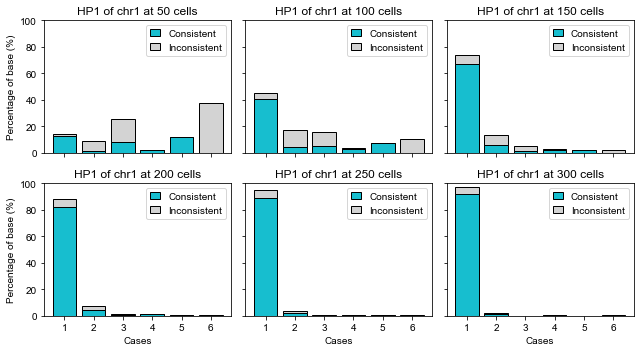

In [50]:
ncells = [50, 100, 150, 200, 250, 300]
cases = [1, 2, 3, 4, 5, 6]
chrom = "chr1"
fig, axs = plt.subplots(2, 3, figsize=(9, 5), sharex=True, sharey=True)

for i, ncell in enumerate(ncells):
    ax = axs[int(i/3)][i % 3]
    plt.sca(ax)
    plt.title("HP1 of %s at %d cells" % (chrom, ncell))

    d = pd.read_csv("../../A1_NanoStrandseqAssembly/results/HG001_Cell_%d/round2/matrix2.stat/%s.tsv" % (ncell, chrom), sep="\t")
    d = d[d["HC"] == 1]
    total = d["Count"].sum()
    
    vs1 = np.array([d[(d["Case1"] == case) & (d["Conf1"])]["Count"].sum() for case in cases]) * 100 / total
    vs2 = np.array([d[(d["Case1"] == case) & (~d["Conf1"])]["Count"].sum() for case in cases]) * 100 / total
    plt.bar(cases, vs1, edgecolor="black", label="Consistent", color="C9")
    plt.bar(cases, vs2, bottom=vs1, edgecolor="black", label="Inconsistent", color="lightgrey")
    
    print(ncell)
    print(vs1)
    
    if int(i / 3) == 1:
        plt.xlabel("Cases")
        
    if i % 3 == 0:
        plt.ylabel("Percentage of base (%)")
        
    plt.xticks(cases)
    plt.ylim(0, 100)
    
    plt.legend(handlelength=1)
    
    # plt.grid(axis="y", ls="--", lw=1, color="lightgrey")

plt.tight_layout()
plt.savefig("figures/base_matrix.pdf", dpi=300)